# Mathematics in Machine Learning project

In [703]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [704]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_df = pd.DataFrame(data['data'], columns=data['feature_names'])
target_df = pd.DataFrame(data['target'], columns=['target'])
df = pd.concat([data_df, target_df], axis=1)

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Data exploration and feature selection

In [705]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [706]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Feature pairwise correlation

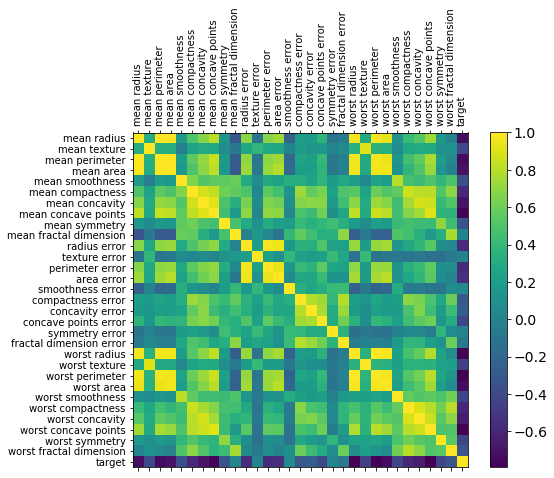

In [708]:
f = plt.figure(figsize=(8, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

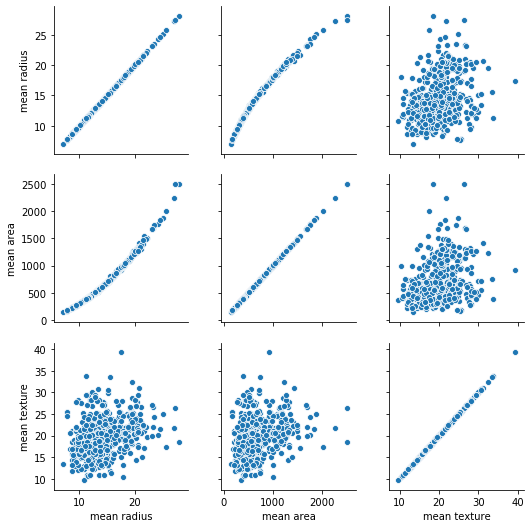

In [709]:
from seaborn import pairplot

sns.pairplot(data=df.loc[:, ['mean radius','mean area', 'mean texture','target']], vars=['mean radius','mean area', 'mean texture'], kind='scatter', diag_kind=None)

In [710]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Features to drop:", to_drop)

Features to drop: ['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


# Dropping correlated features

In [711]:
to_drop = ['mean perimeter', 'worst perimeter','perimeter error','mean radius','worst radius','area error','worst area','worst texture','mean compactness', 'worst compactness', 'compactness error']
X = df.drop(to_drop, axis=1)

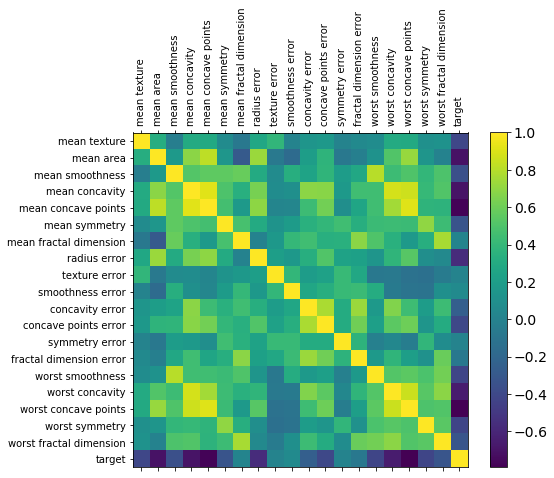

In [712]:
f = plt.figure(figsize=(8, 6))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=10, rotation=90)
plt.yticks(range(X.shape[1]), X.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Kernel density estimate

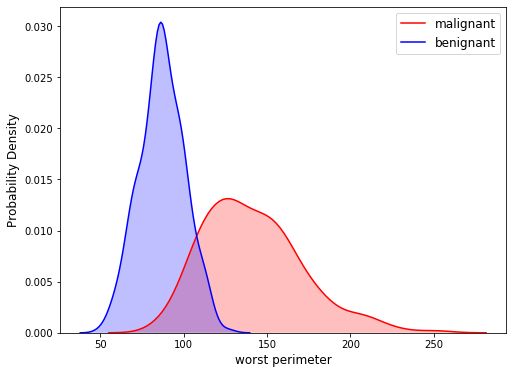

In [713]:
benign_df = df[df['target'] == 1]
malign_df = df[df['target'] == 0]

def kde_plot(feature_name):
    plt.figure(figsize = (8,6))
    sns.kdeplot(malign_df[feature_name], color='r', shade=True, Label= 'malignant') 
    sns.kdeplot(benign_df[feature_name], color='b', shade=True, Label= 'benignant') 
    plt.legend(fontsize = 12)
    plt.xlabel(feature_name, fontsize = 12) 
    plt.ylabel('Probability Density', fontsize = 12)

kde_plot('worst perimeter')

# Splitting data

In [714]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42, shuffle=True, stratify=X['target'])

# Removing outliers only for training data

In [715]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.10)
    Q3 = df[feature].quantile(0.90)
    # IQR is interquartile range.
    IQR = Q3 - Q1   
    filter = (df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 *IQR)
    return df.loc[filter]

print(X_train['target'].value_counts())

for f in X_train.columns:
    X_train = remove_outliers(X_train, f)

print(X_train['target'].value_counts())

1    250
0    148
Name: target, dtype: int64
1    239
0    142
Name: target, dtype: int64


# Normalization

In [716]:
scaler = StandardScaler()
y_train = X_train['target']
X_train = X_train.loc[:, X_train.columns != 'target']
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

y_test = X_test['target']
X_test = X_test.loc[:, X_test.columns != 'target']
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Boxplots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

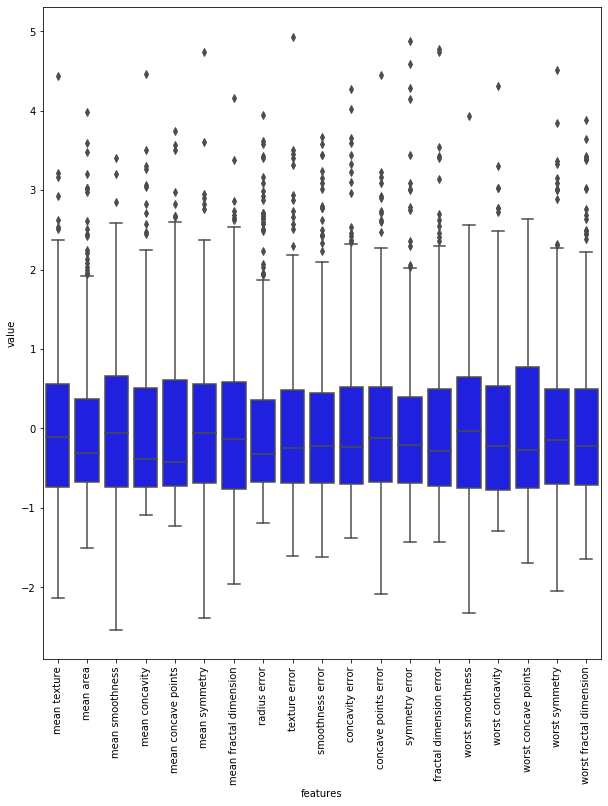

In [717]:
data = pd.concat([y_train, X_train], axis=1)
data = pd.melt(data, id_vars="target",
                    var_name="features",
                    value_name='value')

f = plt.figure(figsize=(10, 12))
sns.boxplot(x="features", y="value", data=data, color='blue', whis=1.5)
plt.xticks(rotation=90)

# Dimensionality reduction

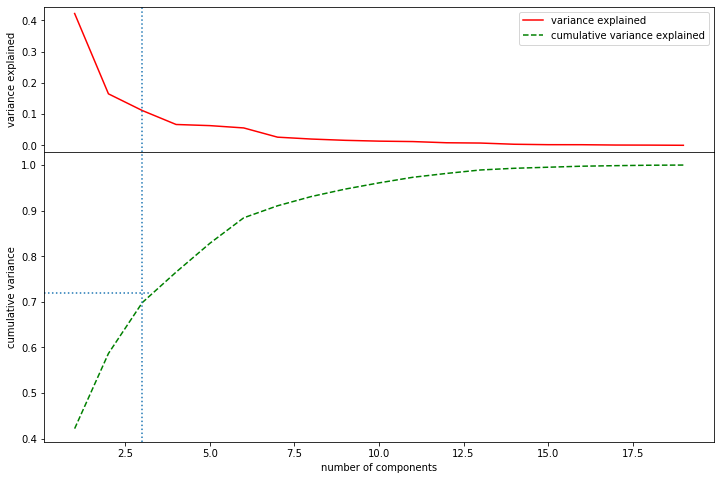

To explain the 72.00% of the total variance we need 3 components.


In [615]:
# PCA dimensionality reduction

def compute_PCA(X, cum_var_tresh = 0.8):
    
    pca = PCA().fit(X_train)
    var_exp = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
    n_comp = np.where(cum_var_exp >= cum_var_tresh)[0][0]
    x = list(range(1, len(var_exp) + 1))

    fig = plt.figure(figsize = (12, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2]) 

    ax0 = plt.subplot(gs[0])
    line0, = ax0.plot(x, var_exp, color='r')

    ax1 = plt.subplot(gs[1], sharex = ax0)
    line1, = ax1.plot(x, cum_var_exp, color='g', linestyle='--')

    ax0.axvline(n_comp, linestyle = ":")
    ax1.axvline(n_comp, linestyle = ":")
    ax1.axhline(cum_var_tresh, 0, n_comp/len(var_exp), linestyle = ":")

    ax0.legend((line0, line1), ('variance explained', 'cumulative variance explained'), loc='upper right')
    ax0.set_ylabel("variance explained")
    ax1.set_xlabel("number of components")
    ax1.set_ylabel("cumulative variance")

    plt.subplots_adjust(hspace=.0)
    plt.show()
    
    return n_comp

cum_var_treshold = 0.72
n_components = compute_PCA(X_train, cum_var_treshold)
print(f"To explain the {cum_var_treshold*100:.2f}% of the total variance we need {n_components} components.")

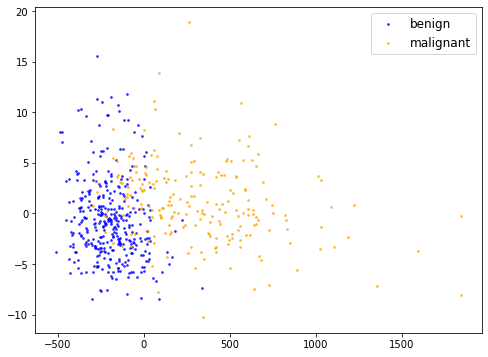

In [616]:
# PCA in 2D

pca = PCA(n_components=2, random_state=42)
X_svd = pd.DataFrame(pca.fit_transform(X))
pos_indexes = X[X['target'] == 0].index
neg_indexes = X[X['target'] == 1].index

X_svd_pos = X_svd.loc[pos_indexes]
X_svd_neg = X_svd.loc[neg_indexes]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_svd_neg[0], X_svd_neg[1], s=3, color='blue', alpha=0.7, label='benign')
ax.scatter(X_svd_pos[0], X_svd_pos[1], s=3, color='orange', alpha=0.7, label='malignant')
plt.legend(loc='upper right', fontsize=12)

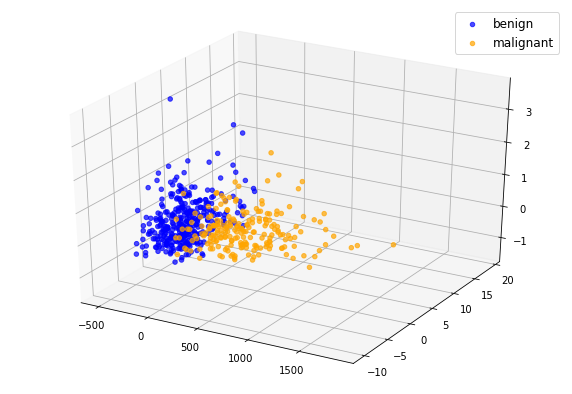

In [617]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt

pca = PCA(n_components=3, random_state=42)
X_svd = pd.DataFrame(pca.fit_transform(X))
pos_indexes = X[X['target'] == 0].index
neg_indexes = X[X['target'] == 1].index

X_svd_pos = X_svd.loc[pos_indexes]
X_svd_neg = X_svd.loc[neg_indexes]


fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
  
ax.scatter3D(X_svd_neg[0], X_svd_neg[1], X_svd_neg[2], color='blue', alpha=0.7, label='benign')
ax.scatter3D(X_svd_pos[0], X_svd_pos[1], X_svd_pos[2], color='orange', alpha=0.7, label='malignant')
plt.legend(loc='upper right', fontsize=12)

# Decision tree classifier

In [718]:
parameters = {'criterion':['gini'], 'splitter':['best', 'random'], 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, scoring='f1_weighted')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [719]:
from sklearn import tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Bagged Trees classifier

In [720]:
parameters = {'n_estimators':[10,15,20,25,30]}
gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='random', random_state=42)), parameters, scoring='f1_weighted')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

# Random Forest classifier

In [721]:
parameters = {'n_estimators':[100,125,150,175,200,225,250]}
gs = GridSearchCV(RandomForestClassifier(random_state=42), parameters, scoring='f1_weighted')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

# AdaBoost classifier on trees

{'n_estimators': 150} 0.9633601246137917
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9674418604651163


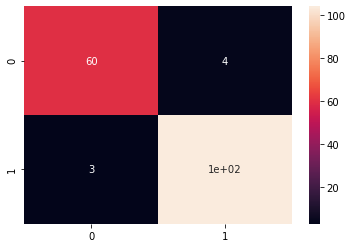

In [642]:
# With a lower depth AdaBoost works better

parameters = {'n_estimators':[100,125,150,175,200,225,250]}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best', random_state=42)), parameters, scoring='f1_weighted')
#gs = GridSearchCV(AdaBoostClassifier(SVC(kernel='linear', C=0.1), algorithm='SAMME'), parameters, scoring='f1_weighted')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)
print(gs.best_params_, gs.best_score_)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

# SVM classifier

{'C': 0.1, 'kernel': 'linear'} 0.971120984278879
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



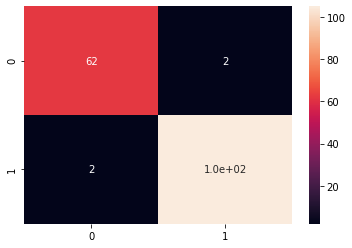

In [623]:
parameters = {'C':[0.01,0.1,1,10,100], 'kernel':['linear','rbf']}
gs = GridSearchCV(SVC(random_state=42), parameters, scoring='accuracy')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)
print(gs.best_params_, gs.best_score_)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

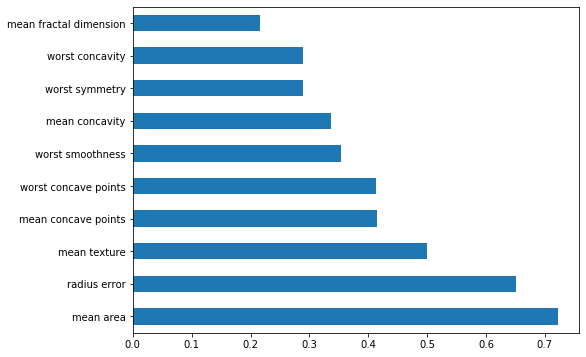

In [630]:
fig, ax = plt.subplots(figsize=(8, 6))
pd.Series(abs(svm.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh')

# Bagged SVM

{'n_estimators': 30} 0.9789126125492601
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.9813084112149533


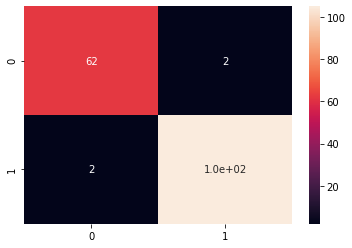

In [631]:
parameters = {'n_estimators':[10,15,20,25,30,100,150,200]}
gs = GridSearchCV(BaggingClassifier(SVC(kernel='linear', random_state=42, C=0.1)), parameters, scoring='f1_weighted')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)
print(gs.best_params_, gs.best_score_)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

# Results visualization

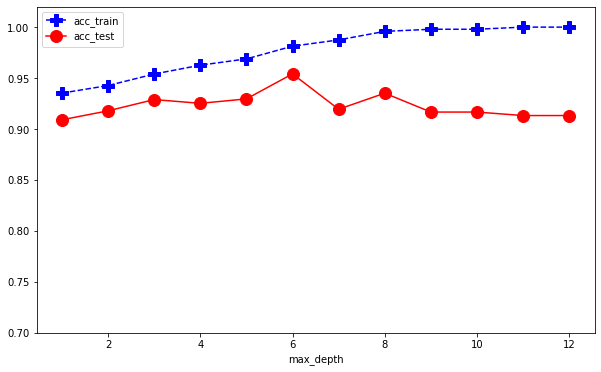

In [495]:
depths = [1, 2, 3, 4, 5, 6,7, 8,9, 10,11,12]
results = {}

for depth in depths:
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini', splitter='random', random_state = 42)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_test = f1_score(y_test, y_pred_test)
    acc_train = f1_score(y_train, y_pred_train)
    results[depth] = [acc_test, acc_train]
styles = ['bP--', 'ro-']
overfitting = pd.DataFrame(columns=['max_depth','acc_train','acc_test'])
overfitting['max_depth'] = results.keys()
overfitting['acc_train'] = [results[k][1] for k in results.keys()]
overfitting['acc_test'] = [results[k][0] for k in results.keys()]
overfitting.plot(x='max_depth', figsize = (10, 6), ylim = (0.7,1.02), style = styles, markersize = 12)

# Trees performances varying max_depth

Text(0, 0.5, 'Accuracy score')

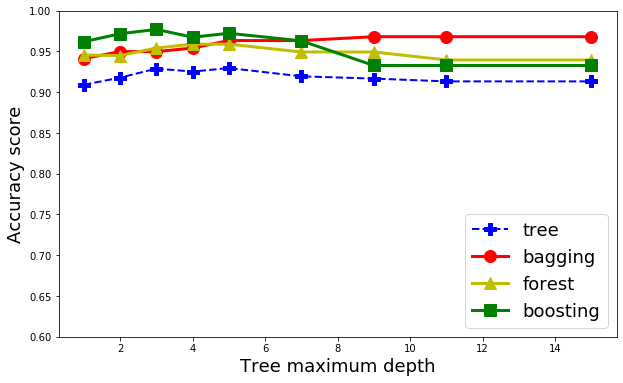

In [587]:
# grafico performance alberi vs profondità
# grafico performance alberi vs num_estimatori
df_tree_results = pd.DataFrame(columns = ["max_depth", "tree", "bagging", "forest", "boosting"])
depths = [1, 2, 3, 4, 5, 7, 9, 11, 15]

for depth in depths:
    
    tree = DecisionTreeClassifier(max_depth = depth, criterion='gini', splitter='random', random_state = 42)
    bag = BaggingClassifier(base_estimator = tree, n_estimators = 110, random_state = 42)
    forest = RandomForestClassifier(max_depth = depth, n_estimators = 110, random_state = 42, max_features='sqrt', criterion='gini')
    boost = AdaBoostClassifier(base_estimator = tree, n_estimators = 110, random_state = 42)

    
    clfs = {
                "tree": tree,
                "bagging" : bag,
                "forest": forest,
                "boosting": boost
    }
    
    results = {
        "max_depth": depth if depth is not None else "inf"
    }
    
    
    for k in clfs.keys():
        
        # print(f"Classifier {k} with max depth {depth}.")
        clf = clfs[k]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = f1_score(y_test, y_pred)
        # print(f"Train accuracy: {acc:.2f}")
        results[k] = acc
        # print("")
        
    df_tree_results = df_tree_results.append(results, ignore_index = True)
    
# plotting the results

df_tree_results.set_index("max_depth")

styles = ['bP--', 'ro-', 'y^-', 'gs-']
lws = [2, 3, 3, 3]

ax = df_tree_results.plot(x = "max_depth", figsize = (10, 6), ylim = (0.6,1), style = styles, markersize = 12)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])
             
plt.legend(loc="lower right", fontsize = 18)
plt.xlabel("Tree maximum depth", fontsize = 18)
plt.ylabel("Accuracy score",  fontsize = 18)

# Performances with ensemble SVM

Text(0, 0.5, 'Accuracy score')

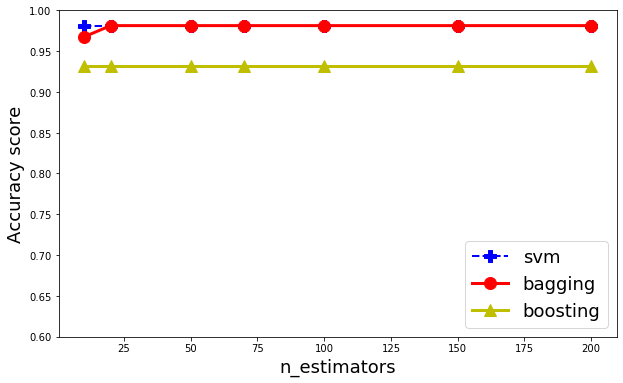

In [605]:
df_tree_results = pd.DataFrame(columns = ["n_estimators", "svm", "bagging", "boosting"])
n_estimators = [10,20,50,70,100,150,200]

for num_est in n_estimators:
    
    svm = SVC(kernel='linear', random_state=42, C=0.1)
    bag = BaggingClassifier(base_estimator = svm, n_estimators = num_est, random_state = 42)
    boost = AdaBoostClassifier(base_estimator = svm, n_estimators = num_est, random_state = 42, algorithm='SAMME')

    
    clfs = {
                "svm": svm,
                "bagging" : bag,
                "boosting": boost
    }
    
    results = {
        "n_estimators": num_est if num_est is not None else "inf"
    }
    
    
    for k in clfs.keys():
        
        # print(f"Classifier {k} with n_estimators {num_est}.")
        clf = clfs[k]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = f1_score(y_test, y_pred)
        # print(f"Train accuracy: {acc:.2f}")
        results[k] = acc
        #print("")
        
    df_tree_results = df_tree_results.append(results, ignore_index = True)
    
# plotting the results

df_tree_results.set_index("n_estimators")

styles = ['bP--', 'ro-', 'y^-', 'gs-']
lws = [2, 3, 3, 3]

ax = df_tree_results.plot(x = "n_estimators", figsize = (10, 6), ylim = (0.6,1), style = styles, markersize = 12)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])
             
plt.legend(loc="lower right", fontsize = 18)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("Accuracy score",  fontsize = 18)